In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use('ggplot')


(300, 3)
[[  1.08216053   1.05913164   1.10037913]
 [  2.94347914  10.25910124   9.92859384]
 [  4.97329119   5.03334557   4.92381543]]
Number of estimated clustering centers is:  3


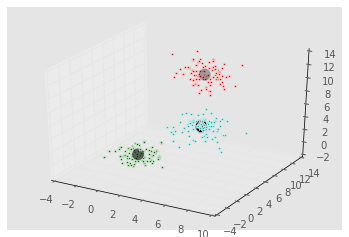

In [2]:
# first use sklearn's meanshift do some exercises
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs

centers = [[1,1,1], [5,5,5], [3,10,10]]
X, _ = make_blobs(n_samples=300, centers=centers, cluster_std=1)
print(X.shape)
#print(_)

clf = MeanShift()
clf.fit(X)
labels = clf.labels_
cluster_centers = clf.cluster_centers_
print(cluster_centers)
n_clusters = len(np.unique(labels))
print("Number of estimated clustering centers is: ", n_clusters)

# 3D plotting
colors = 10*['g', 'r', 'c', 'k', 'b', 'y', 'm']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='*')
    
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], s=150, c='k', zorder=10, marker='o')



In [5]:
# here I am going to use MeanShift to cluster titanic dataset
from sklearn import preprocessing
import ML_module

df = pd.read_excel('titanic.xls')
original_df = pd.DataFrame.copy(df)
print(df.head())

df.drop(['name', 'body'], 1, inplace=True)
df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)
ML_module.handle_non_numeric_data(df)
print(df.head())

df.drop(['home.dest', 'ticket'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])
print(X[:2])

clf = MeanShift()
clf.fit(X)
labels = clf.labels_
cluster_centers = clf.cluster_centers_
print(len(np.unique(labels)))

original_df['cluster_group'] = np.nan

for i, label in enumerate(labels):
    original_df['cluster_group'].iloc[i] = label

survival_rates = {}
n_clusters = len(np.unique(labels)) 
for i in range(n_clusters):
    temp_df = original_df[ (original_df['cluster_group'] == i)]
    survival_cluster = temp_df[ (temp_df['survived'] == i) ]
    survival_rate = len(survival_cluster)/len(temp_df)
    survival_rates[i] = survival_rate
    
print(survival_rates)
    

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

C:\Users\ting\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


3


C:\Users\ting\Anaconda3\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


{0: 0.6229508196721312, 1: 0.8888888888888888, 2: 0.0}


In [9]:
# let's see what things our results told us
print( original_df[ (original_df['cluster_group'] == 1)][:5])    # most of the first class passengers survived
print( original_df[ (original_df['cluster_group'] == 1)].describe())

    pclass  survived                                               name  \
17       1         1    Baxter, Mrs. James (Helene DeLaudeniere Chaput)   
35       1         1                           Bowen, Miss. Grace Scott   
49       1         1                 Cardeza, Mr. Thomas Drake Martinez   
50       1         1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
66       1         1                        Chaudanson, Miss. Victorine   

       sex   age  sibsp  parch    ticket      fare        cabin embarked boat  \
17  female  50.0      0      1  PC 17558  247.5208      B58 B60        C    6   
35  female  45.0      0      0  PC 17608  262.3750          NaN        C    4   
49    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C    3   
50  female  58.0      0      1  PC 17755  512.3292  B51 B53 B55        C    3   
66  female  36.0      0      0  PC 17608  262.3750          B61        C    4   

    body                                       home.dest  clus

In [12]:
print( original_df[ (original_df['cluster_group'] == 2)][:5])         # most third class passengers died
print( original_df[ (original_df['cluster_group'] == 2)].describe())

     pclass  survived                                               name  \
629       3         0                        Andersson, Mr. Anders Johan   
632       3         0  Andersson, Mrs. Anders Johan (Alfrida Konstant...   
644       3         0         Asplund, Mr. Carl Oscar Vilhelm Gustafsson   
646       3         1  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
831       3         0                     Goodwin, Mr. Charles Frederick   

        sex   age  sibsp  parch   ticket     fare cabin embarked boat   body  \
629    male  39.0      1      5   347082  31.2750   NaN        S  NaN    NaN   
632  female  39.0      1      5   347082  31.2750   NaN        S  NaN    NaN   
644    male  40.0      1      5   347077  31.3875   NaN        S  NaN  142.0   
646  female  38.0      1      5   347077  31.3875   NaN        S   15    NaN   
831    male  40.0      1      6  CA 2144  46.9000   NaN        S  NaN    NaN   

                                home.dest  cluster_group  
629

In [16]:
print( original_df[ (original_df['cluster_group'] == 0)][:5])
print( original_df[ (original_df['cluster_group'] == 0)].describe())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  cluster_group  
0         

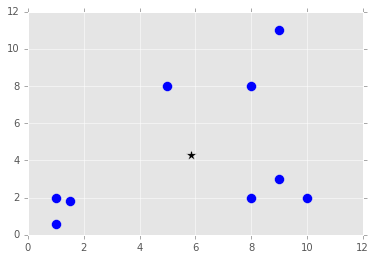

In [7]:
# implement MeanShift myself here
X = np.array([[1,2], [1.5, 1.8], [5,8], [8,8], [1, 0.6], [9,11], [8, 2], [10 ,2], [9, 3]])
#plt.scatter(X[:, 0], X[:, 1], s=100)

colors = 10*['g', 'r', 'b', 'c', 'k']

class Mean_Shift():
    def __init__(self, radius=20):
        self.radius = radius
        
    def fit(self, data):
        centroids = {}
        
        for i in range(len(X)):
            centroids[i] = data[i]
            
        while True:
            new_centroids = []
            
            for i in centroids:
                centroid = centroids[i]
                in_bandwidth = []
                
                for featureset in data:
                    if np.linalg.norm(featureset - centroid) < self.radius:
                        in_bandwidth.append(featureset)
                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))
                
            uniques = sorted(list(set(new_centroids)))
        
            prev_centroids = dict(centroids)
            centroids = {}       # remove everything
        
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
            
            optimized = True
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
            
            if optimized:
                break
                
        self.centroids = centroids
        
    def predict(self, data):
        pass
    
clf = Mean_Shift()
clf.fit(X)

plt.scatter(X[:, 0], X[:, 1], s=100)
centroids = clf.centroids

for i in centroids:
    plt.scatter(centroids[i][0], centroids[i][1], s=120, marker="*", c='k')

{0: array([-9.63895901, -6.56597433]), 1: array([-8.30388703, -7.02256236]), 2: array([-6.88263123, -9.11416558]), 3: array([-6.85524108, -3.82176262]), 4: array([-6.72765735, -7.45432507]), 5: array([-6.35713033, -2.86514358]), 6: array([-5.95350901, -3.97355011]), 7: array([-5.71283812, -5.84463453]), 8: array([-5.48503844, -3.02281163]), 9: array([-5.40088304, -8.03379912]), 10: array([-4.46832147, -4.44991581]), 11: array([-0.50746101, -4.83342789]), 12: array([-0.34206699, -6.99287331]), 13: array([ 0.40515158, -6.74920766]), 14: array([ 5.15796894,  8.10974697]), 15: array([ 5.47412862,  5.58771863]), 16: array([ 5.48367958,  5.59152944]), 17: array([ 5.95200387,  7.15514538]), 18: array([ 6.0835835 ,  5.56119058]), 19: array([ 6.7072567 ,  3.59890646]), 20: array([ 6.88012389,  7.77941063]), 21: array([ 8.74228973,  7.71963367])}


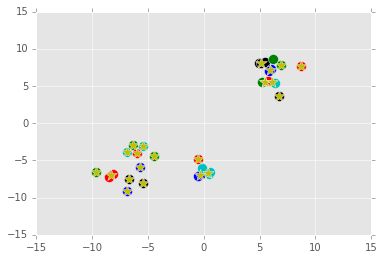

In [67]:
# in the previous implementation, we hard-coded the radius, and it might not work if you put radius=40. \
# so we need to dynamically set the size of the radius and put some weight for those closer to the centroids
class Mean_Shift_Dynamic():
    def __init__(self, radius=None, radius_norm_step=100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
        
    def fit(self, data):
        # we first need to define radius if radius is not defined!
        if self.radius == None:
            # the entire dataset has a center, find it here and its length to origi!
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.radius_norm_step
            
        # everything featureset is a centroids, so initialize all of them
        centroids = {}
        for i in range(len(data)):
            centroids[i] = data[i]
            
        # define weight here, the closer to the centroid, the more weight it has
        weights = [i for i in range(self.radius_norm_step)][::-1]
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                for featureset in data:
                    #print(featureset)
                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.00000000001
                        
                    weight_index = int(distance / self.radius)
                    #print("weight_index is ", weight_index)
                    #print("weight is ", weights[weight_index])
                    if weight_index > self.radius_norm_step - 1:
                        weight_index = self.radius_norm_step - 1
                    
                    # to increase the weight, we multiple the array by a large factor to increase
                    # the featureset, for example: 3*[1,4] = [[1,4], [1,4], [1,4]]
                    to_add = (weights[weight_index]*2) * [featureset]
                    #print("to add is ", to_add)
                    in_bandwidth += to_add   # both of them are arrays, so adding two arrays together, you could use +=
                    
                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))
                
            # get rid of duplicates
            uniques = sorted(list(set(new_centroids)))
            #print("uniques is: ", uniques)
            
            # now we need to handle the cases where two centroids are very close to each other, need to remove one from the list
            to_pop = []
            seen = []
            for i in uniques:
                for ii in uniques:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii)) <= self.radius:
                        if (i not in seen) and (ii not in seen):
                            to_pop.append(ii)
                            seen.append(i)
                            seen.append(ii)
            
                    #print("to pop is ", to_pop)
            for i in to_pop:
                uniques.remove(i)
            
            prev_centroids = dict(centroids)
            centroids = {}
            
            # assign the centroids
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
            
            optimized = True
            for i in range(len(uniques)):
                if not np.array_equal(uniques[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break;
                    
            if optimized:
                break
                
        self.centroids = centroids
    
        self.classifications = {}
        for i in range(len(centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.classifications[classification].append(featureset)
    
    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

# now use randomly generated dataset for the analysis
from sklearn.datasets.samples_generator import make_blobs
import random

centers = random.randrange(2,8)
X, y = make_blobs(n_samples=30, centers=centers, n_features=2)
#X, y = make_blobs(n_samples=30, centers=2, n_features=2)

clf = Mean_Shift_Dynamic()
clf.fit(X)
centroids = clf.centroids
classifications = clf.classifications
print(centroids)

# the following will do the calculation for everything featureset, so not very good, should use the one follow it
#for i in range(len(X)):
#    classification = clf.predict(X[i])
#    plt.scatter(X[i][0], X[i][1], s=120, c=colors[classification])
    
# or use different approach for plotting
for classification in clf.classifications:
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], s=100, c=colors[classification])

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], c='y', s=150, marker='*')
    #plt.scatter(centroids[i][0], centroids[i][1], s=120, marker="*", c='k')